<a href="https://colab.research.google.com/github/lee-j-j/LJJ/blob/main/OpenCV_024_%ED%99%94%EC%A7%88%EA%B0%9C%EC%84%A0(RealESRGAN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://arome1004.cafe24.com/images/opencv/lecture_image/00_title.png"></center>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:30px; text-align: center;"><font size=4 color=blue><b>[24차시] 학습목표</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=2>○ - <br><br>
○ - <br><br>
○ - </font></td></tr>   
</table>

# 영상복원 (이미지 화질 개선) (Real ESRGAN)

- 소스코드 : https://github.com/xinntao/Real-ESRGAN
- 릴리스 버전 : https://github.com/xinntao/Real-ESRGAN/releases
- 논문 : https://arxiv.org/abs/2107.10833
- 논문분석 : https://velog.io/@heaseo/Real-ESRGAN-Training-Real-World-Blind-Super-Resolution-with-Pure-Synthetic-Data-해석

- Real-ESRGAN 사례
<center><img src="https://arome1004.cafe24.com/images/opencv/lecture_image/24_esrgan.png" width=80%></center>

## 준비하기

In [2]:
# Real-ESRGAN를 git 주소에서 clone하기
!git clone https://github.com/xinntao/Real-ESRGAN.git
%cd Real-ESRGAN

# 라이브러리 다운로드
!pip install basicsr
!pip install facexlib
!pip install gfpgan
!pip install -r requirements.txt

!python setup.py develop

Cloning into 'Real-ESRGAN'...
remote: Enumerating objects: 755, done.
remote: Total 755 (delta 0), reused 0 (delta 0), pack-reused 755
Receiving objects: 100% (755/755), 5.37 MiB | 11.19 MiB/s, done.
Resolving deltas: 100% (410/410), done.
/content/Real-ESRGAN
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 76.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 17.9 MB/s eta 0:00:00
  Created wheel for basicsr: filename=basicsr-1.4.2-py3-none-any.whl size=214817 sha256=4334d0f8825f7463337b90a90157baac868918f12ef12fc1827d54b58ef592e9
  Stored in directory: /root/.cache/pip/wheels/38/83/99/2d8437cc652a01af27df5ff037a4075e95b52d67705c5f30ca
Successfully built basicsr
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 1.5 MB/s eta 0:00:00
     ━━━━

## 사전 훈련된 모델 다운로드
- https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.0/RealESRGAN_x4plus.pth
- 다운받은 파일을  \Real-ESRGAN\Real-ESRGAN\experiments\pretrained_models로 이동

## 이미지 업로드
- upload 폴더로 흐린 원본 이미지 (input 폴더에 샘플이미지 및 동영상 포함) 복사

In [3]:
import os
import shutil

upload_folder = 'upload'
result_folder = 'results'

base_foloder = "/content/Real-ESRGAN"
upload_folder = base_foloder + '/upload/'
result_folder = base_foloder + '/results/'

if not os.path.exists(upload_folder) :
    os.mkdir(upload_folder)

# 폴더와 파일 삭제
# 만약 폴더에 파일이나 다른 폴더가 있다면
if os.path.isdir(result_folder):
    # 파일과 폴더를 다 삭제
    shutil.rmtree(result_folder)

# 결과 폴더를 새로 생성
os.mkdir(result_folder)

## 실행하기
- upload 폴더의 이미지를 개선하여 results 폴더에 저장

In [4]:
# -n 모델명
# -i 이미지폴더명
# --outscale 출력스케일값
# --face_enhance : GFPGAN를 사용한 이미지 개선
!python inference_realesrgan.py -n RealESRGAN_x4plus -i upload --outscale 3.5 --face_enhance

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional_tensor.py:5: UserWarning: The torchvision.transforms.functional_tensor module is deprecated in 0.15 and will be **removed in 0.17**. Please don't rely on it. You probably just need to use APIs in torchvision.transforms.functional or in torchvision.transforms.v2.functional.
  warnings.warn(
Downloading: "https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.0/RealESRGAN_x4plus.pth" to /content/Real-ESRGAN/weights/RealESRGAN_x4plus.pth

100% 63.9M/63.9M [00:00<00:00, 390MB/s]
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current b

## 결과 출력
- results 폴더의 개선된 이미지 출력

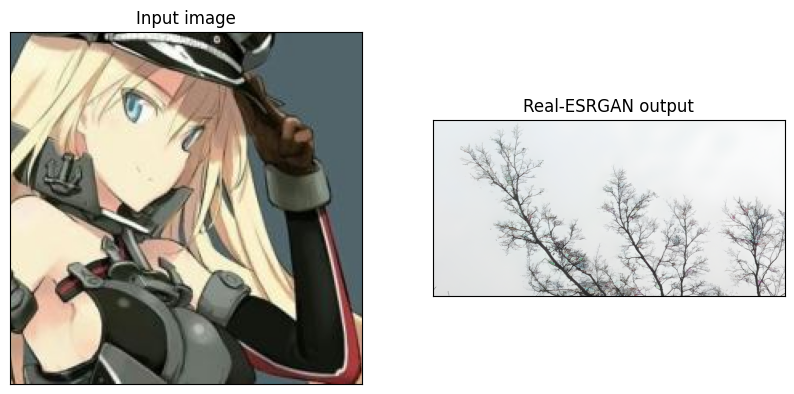

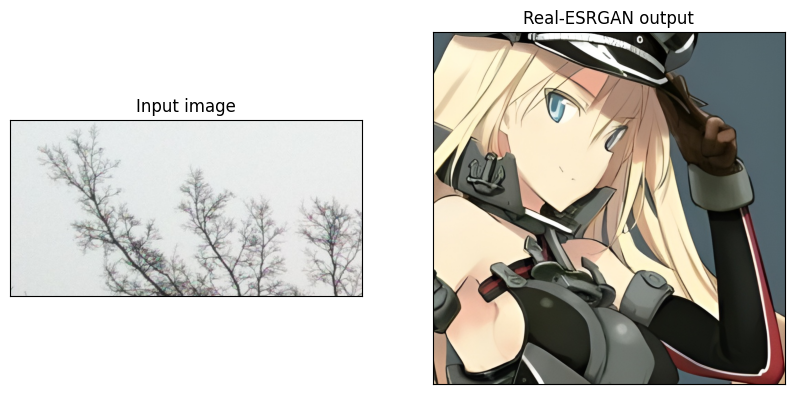

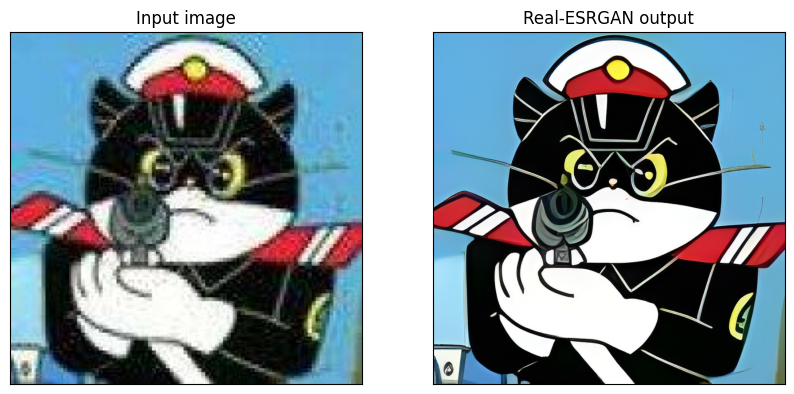

In [5]:
import cv2
import matplotlib.pyplot as plt
import os.path

in_files = os.listdir(upload_folder)
out_files = os.listdir(result_folder)

for in_file, out_file in zip(in_files, out_files):
    in_img = cv2.imread(upload_folder + in_file)
    out_img = cv2.imread(result_folder + out_file)

    in_img = cv2.cvtColor(in_img, cv2.COLOR_BGR2RGB)
    out_img = cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.xticks([]); plt.yticks([])
    plt.title("Input image")
    plt.imshow(in_img)

    plt.subplot(1, 2, 2)
    plt.xticks([]); plt.yticks([])
    plt.title("Real-ESRGAN output")
    plt.imshow(out_img)

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:40px; text-align: center;"><font size=4 color=blue><b>[24차시] 정리하기</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>○            
        </font></td></tr>   
</table>